<a href="https://colab.research.google.com/github/quantumhome/DataAnalysisCaseStudy/blob/master/StochasticGradientDescent_Aisha(18_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STOCHASTIC GRADIENT DESCENT

- Problem solved: reducing loss
- Prediction = Input * (weights/parameter/coefficients)
    - so to reduce the error, we try fixing the "numbers".
- Loss functon judged the model as bad or good
    - change the numbers(weights) so loss becomes smaller
- Gradient helps identify the "up" direction(which way increases error fastest)
- Descent means go the opposite way
- **GRADIENT DESCENT** is a method that repeatedly adjusts model weights in the direction that reduces error.

1. Start with inital weights
2. Make a prediction
3. Calculate cost(error)
4. Find direction to reduce error(gradient)
5. Adjust weights slightly
6. Step size decided by learning rate
7. Repeat until
   - cost stops reducing
   - you reach the minimum cost

##SGD:
- Take one data point
- Predict
- Calculate error
- Update weights
- Move to the next data point

**many small, faster corrections**

###Zig-Zag path of SGD
- Zig-zag = exploration
- Helps escape the local minima
- Learns faster
- Generalizes better

**INDUSTRY PREFERS GOOD AND FAST OVER PERFECT AND SLOW**



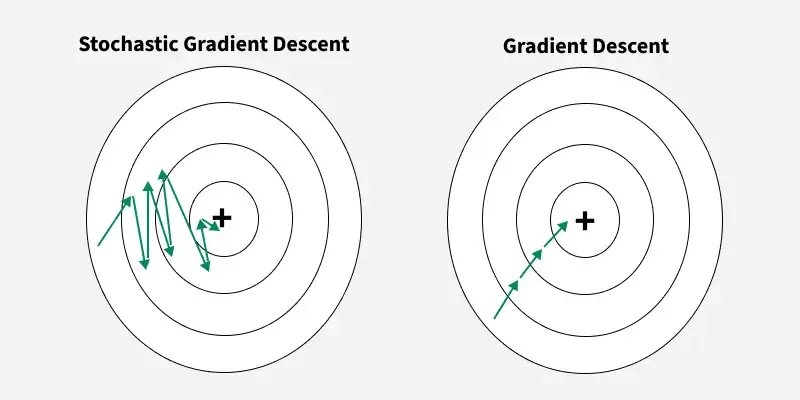

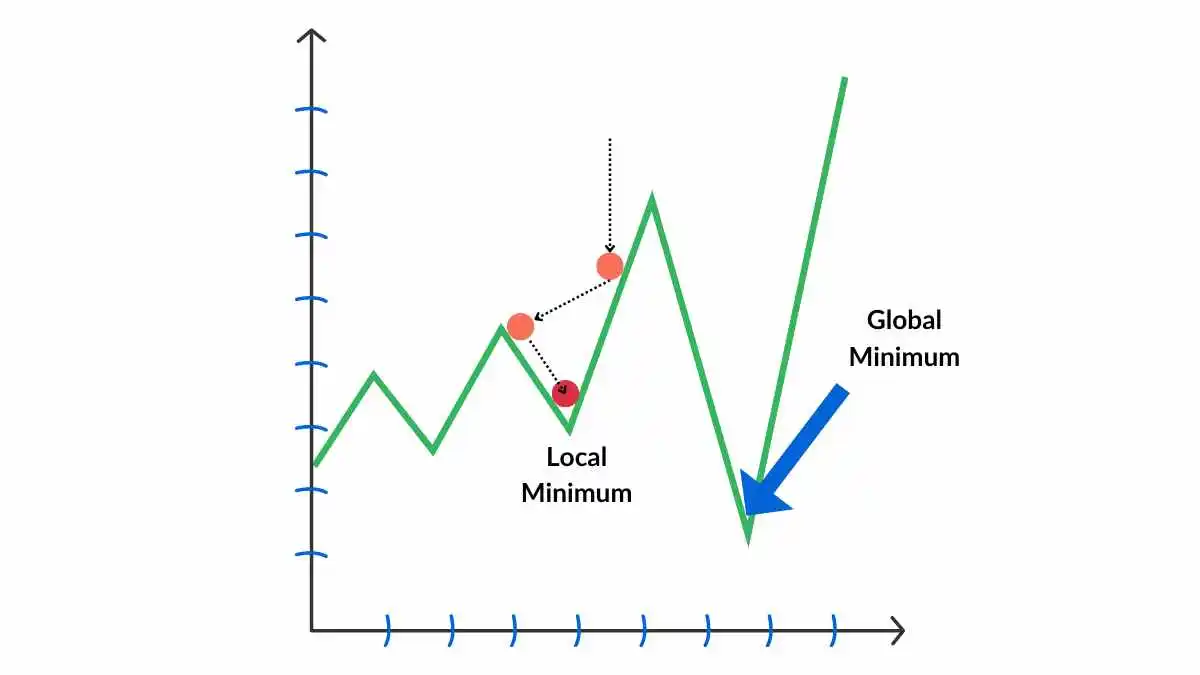

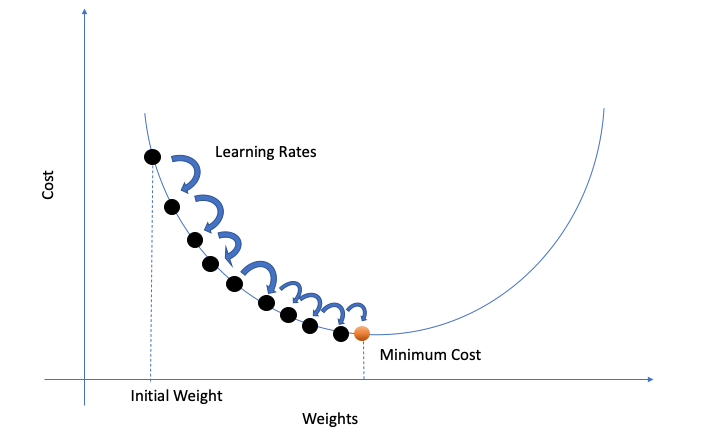

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Why is StandardScaler critical when using SGD-based models?

- to better generalize the data so that the numeric values do not dominate.

In [ ]:
# https://drive.google.com/file/d/1qU8m3UDk5QF5fJV_Zb8nBfdhQwiTFM29/view?usp=sharing

In [ ]:
df=pd.read_csv("/content/bank-additional-full_final (3).csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
#Target variable analysis

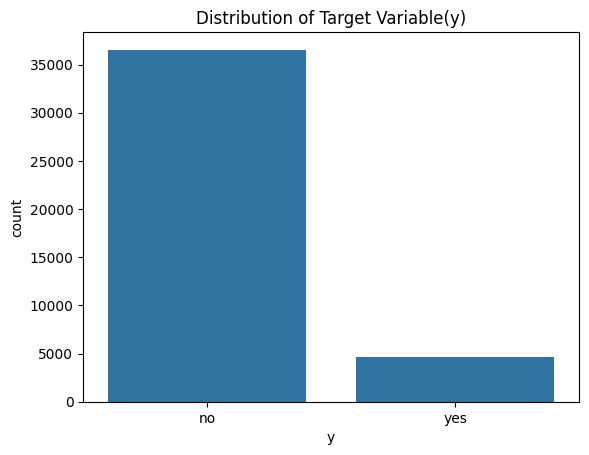

In [ ]:
sns.countplot(x='y',data=df)
plt.title("Distribution of Target Variable(y)")
plt.show()

In [ ]:
#Label Encoding is allowed in SGD but only for target(Y) in classification, it's not recommended for input
#SGD treats numbers as having magnitude and distance

#Better Approach: One hot encoding, Ordinal Encoding(only if order is real)

In [ ]:
#Encode the Target Variable

df['y']= df['y'].map({'yes':1,'no': 0})

In [ ]:
#null values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
#duplicates
df.duplicated().sum()

np.int64(1784)

In [ ]:
df.drop_duplicates(inplace=True)

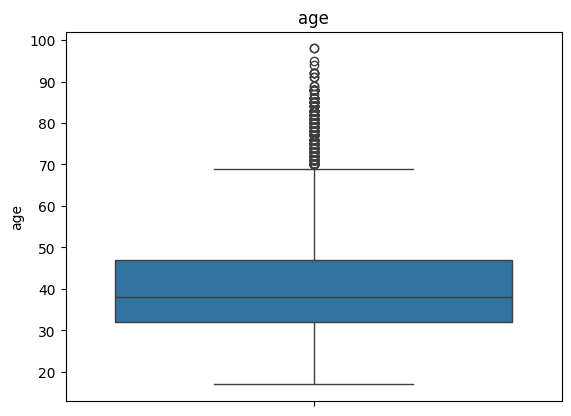

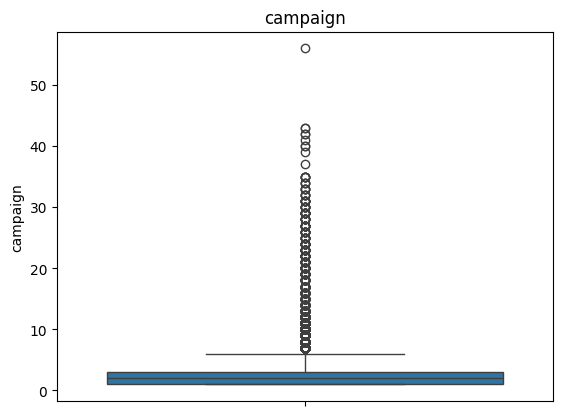

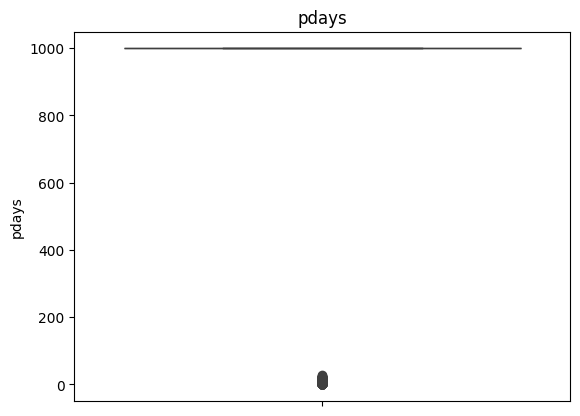

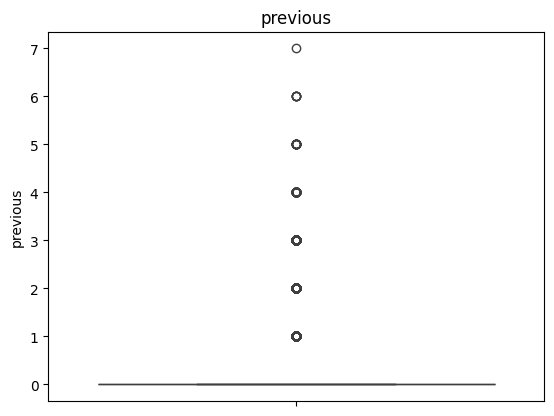

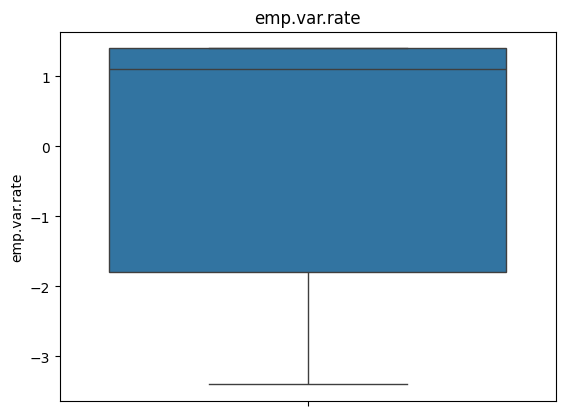

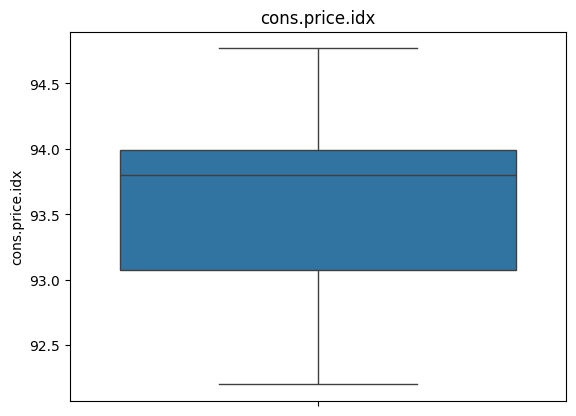

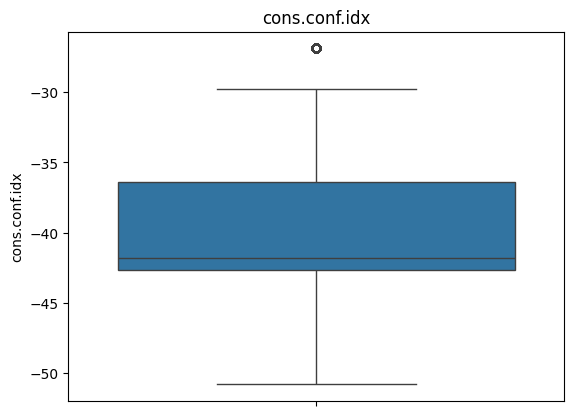

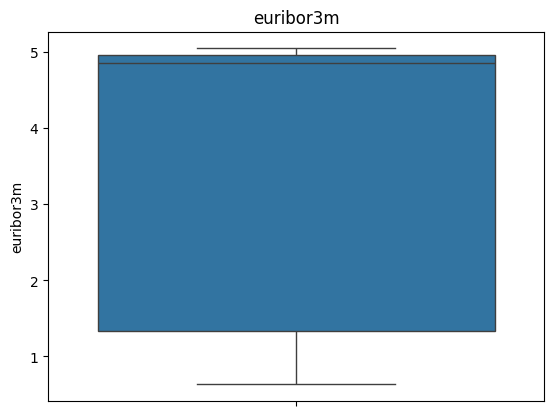

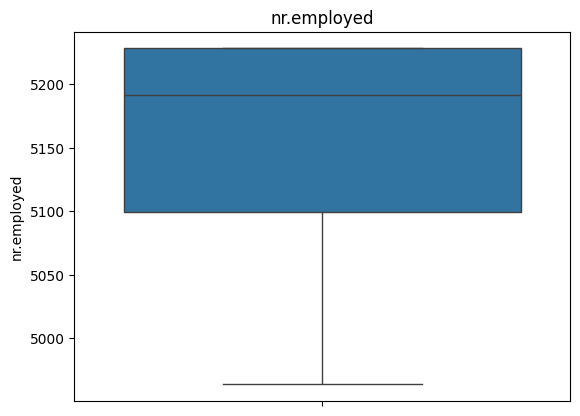

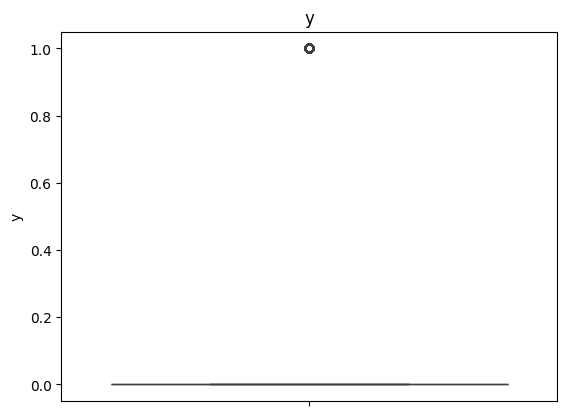

In [ ]:
#Outlier visualization

for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

In [ ]:
out_lis = ['age','campaign','cons.conf.idx']
for col in out_lis:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  UB = Q3 + 1.5*IQR
  LB = Q1 - 1.5*IQR

  df = df[(df[col]>LB) &(df[col]<UB)]

In [ ]:
numeric_df=df.select_dtypes(include=['int64','float64'])
numeric_df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...
41181,37,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,1,9,1,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
#----MODEL BUILDING----
#Base Model + SGD(optimizer)

In [ ]:
x=numeric_df.drop(columns=['y'])
y=numeric_df['y']

In [ ]:
x

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...
41181,37,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41182,29,1,9,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41181,1
41182,0
41184,0
41185,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=42)

In [ ]:
#SCALING

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#fit scaler only on training data and scale it
x_trainScaled=scaler.fit_transform(x_train)

#scale test data using same scaler
x_testScaled=scaler.transform(x_test)

print(x_trainScaled)

[[-0.27337634 -0.85726856  0.19821231 ... -1.23316124 -1.30578075
  -0.94474545]
 [-0.89254732 -0.85726856  0.19821231 ... -0.29160816  0.34159074
   0.41365377]
 [ 0.34579464  2.66366593  0.19821231 ... -0.44853367  0.78482452
   0.86739002]
 ...
 [ 0.7585753  -0.85726856  0.19821231 ... -0.44853367  0.78771769
   0.86739002]
 [-0.99574249 -0.85726856  0.19821231 ...  0.96379594  0.72638247
   0.34622548]
 [-0.686157    0.90319868  0.19821231 ... -0.44853367  0.7911895
   0.86739002]]


In [ ]:
#Train SGDClassifier

from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier(
    loss='log_loss', #logistic regression
    max_iter=1000,
    learning_rate='optimal', #auto-adjusts step size
    random_state=42
)

sgd.fit(x_trainScaled,y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [ ]:
y_pred=sgd.predict(x_testScaled)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import *

print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.8847082209285816


In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

model=lr.fit(x_trainScaled, y_train)

model

y_pred1=model.predict(x_testScaled)
y_pred1

accuracy_score(y_test,y_pred1)

0.8945051824506602

In [ ]:
#Perform Encoding(Choice)
#Perform Logisitic Regression for Accuracy Comparison

#Kaggle Huge datasets -> explore mounting datasets -> Perform SGD

#SGD Use and Advantages

- Data is large
- Countinously arriving
- Needs fast, incremental learning
- Can't fit fully in memory

1. Recommendation Systems
2. Fraud Detection
3. Search Engines and Ranking


#SGD IN AI
- AI models(especially in Neural Networks) have millions and billions of weights
- Learn by trial -> error -> correction